In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression
Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)

The response/dependent variable (that we want to predict)(Y)

Linear Function  
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
 
a refers to the intercept of the regression line, in other words: the value of Y when X is 0

b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
print(lm, type(lm))

LinearRegression() <class 'sklearn.linear_model._base.LinearRegression'>


##### How could "highway-mpg" help us predict car price?
For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [5]:
X= df[['highway-mpg']]
Y = df[['price']]

lm.fit(X,Y) #fit the linear model

LinearRegression()

In [6]:
Yy = lm.predict(X) # we can output a prediction
Yy.size

201

In [7]:
lm.intercept_ # value of intercept in the linear equation

array([38423.30585816])

In [8]:
lm.coef_ # value of slope in the linear equation

array([[-821.73337832]])

In [9]:
lm1 = LinearRegression()

X1 = df[['engine-size']]
Y1 = df[['price']]

lm1.fit(X1,Y1)

LinearRegression()

In [10]:
Yyy = lm1.predict(X1)
Yyy[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [11]:
print(lm1.intercept_,lm1.coef_)

[-7963.33890628] [[166.86001569]]


### Multiple Linear Regression
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors.

In [12]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z,df['price'])

print(lm.intercept_)
print(lm.coef_)

-15806.624626329198
[53.49574423  4.70770099 81.53026382 36.05748882]


In [13]:
Yhat = lm.predict(Z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [14]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"

Z1 = df[['normalized-losses','highway-mpg']]

lm.fit(Z1,df['price'])

print(lm.intercept_)
print(lm.coef_)

38201.31327245728
[   1.49789586 -820.45434016]


### Model Evaluation Using Visualization

In [15]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### Regression plot

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

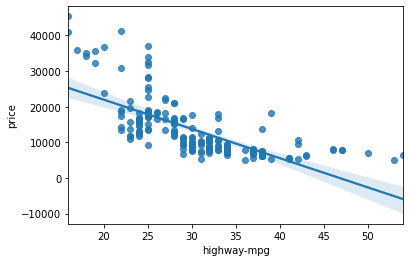

In [16]:
sns.regplot(x='highway-mpg',y='price',data=df)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

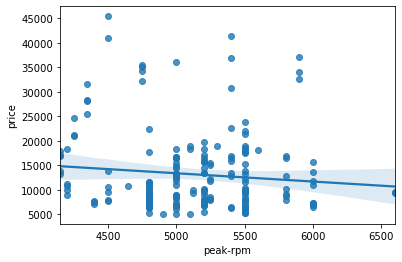

In [17]:
sns.regplot(x='peak-rpm',y='price',data=df)

In [18]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


### Residual plot
What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

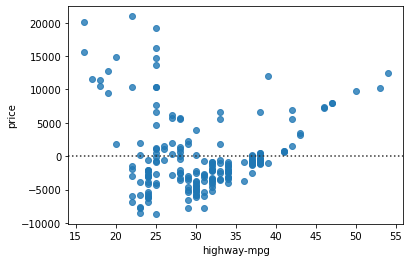

In [19]:
sns.residplot(x=df['highway-mpg'], y=df['price'],data=df)

### Distribution plot
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


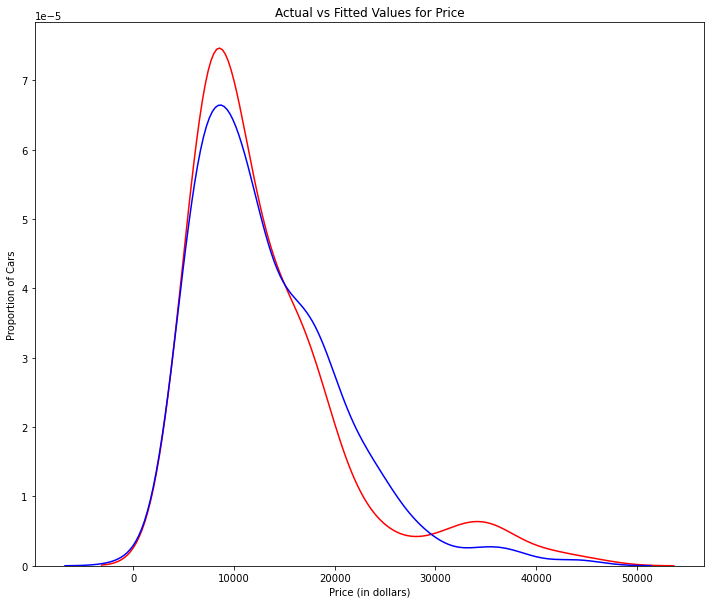

In [20]:
# Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# Yhat = lm.predict(Z) # lets use this

plt.figure(figsize=(12,10))

ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit

C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91810\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

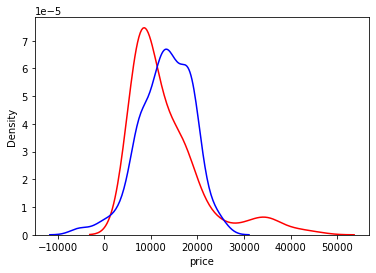

In [21]:
# Z1 = df[['normalized-losses','highway-mpg']]
Yhatt = lm.predict(Z1)

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhatt, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd Order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2
 
Cubic - 3rd Order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3
Higher-Order:
𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....

In [22]:
# lets create a func to pot the data
def PlotPoly(model,indval,depval,Name):
    xn = np.linspace(15,55,100)
    yn = model(xn)
    
    plt.plot(indval, depval,'.',xn,yn,'-')
    plt.title('Polynomial Fit with matplotlib for price ~ length')
    ax=plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of cars')
    
    plt.show()
    plt.close()

In [23]:
# variables
x= df['highway-mpg']
y = df['price']

# polynomial of deg=3 (3rd order/cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)

print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


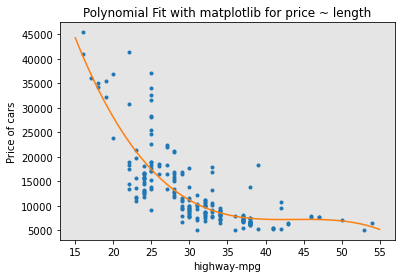

In [24]:
PlotPoly(p,x,y,'highway-mpg')

In [25]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

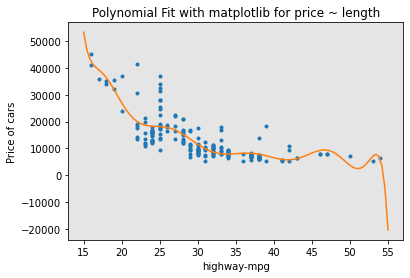

In [26]:
# Create 11 order polynomial model with the variables x and y from above

f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)

PlotPoly(p1,x,y,'highway-mpg')

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [29]:
Z_pr = pr.fit_transform(Z)

In [30]:
Z.shape

(201, 4)

In [31]:
Z_pr.shape

(201, 15)

### Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
inputt = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [34]:
pipe = Pipeline(inputt)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [35]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [36]:
ypipe = pipe.predict(Z)
ypipe.size

201

In [37]:
type(ypipe)

numpy.ndarray

In [38]:
ypipe[0:6]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302])

### Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared

Mean Squared Error (MSE)

#### Model 1: Simple Linear Regression

In [39]:
# Let's calculate the R^2:

#highway_mpg_fit
lm.fit(X,Y)
print(lm.score(X,Y)) # R square : We can say that ~49.659% of the variation of the price is explained by this simple linear model

0.4965911884339175


In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
# Lets calculate the MSE:

Yhat = lm.predict(X)

mse = mean_squared_error(df['price'],Yhat)
mse

31635042.944639895

### Model 2: Multiple Linear Regression

In [42]:
# Lets calculate the R^2:

lm.fit(Z,df['price'])

print(lm.score(Z,df['price'])) # R-Sqaured : We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit"


0.8093562806577457


In [43]:
# Lets calculate the MSE :

Ymulti = lm.predict(Z)

print(mean_squared_error(df['price'], Ymulti))

11980366.87072649


### Model 3: Polynomial Fit

In [44]:
# Let's calculate the R^2.:

from sklearn.metrics import r2_score

In [45]:
rsq = r2_score(y,p(x))
rsq #We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

0.6741946663906513

In [46]:
# MSE :

msepoly = mean_squared_error(df['price'],p(x))
msepoly

20474146.42636125

## Prediction

In [47]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [48]:
# create new input
inputn = np.arange(1,100,1).reshape(-1,1)

# fit the model
lm.fit(X,Y)

# produce a prediction
yyhat = lm.predict(inputn)
print(yyhat[0:5])
print(yyhat.size)

[[37601.57247984]
 [36779.83910151]
 [35958.10572319]
 [35136.37234487]
 [34314.63896655]]
99


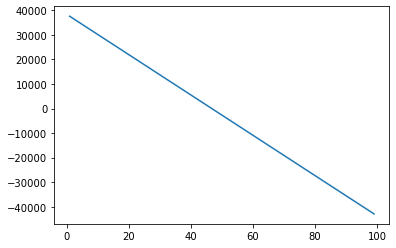

In [49]:
plt.plot(inputn,yyhat)
plt.show()

## Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.


R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.


R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.


R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

Simple Linear Model (SLR) vs. Polynomial Fit

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.


Multiple Linear Regression (MLR) vs. Polynomial Fit

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price